In [1]:
import pandas as pd
import Experiment_SS as exss

# Adjust pandas options to see all columns and to read subgroup descriptions fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 200)

In [2]:
exss.main(course='portuguese', test_size=0.2, min_size=25)

Collected 50 subgroup models.
Complex baseline evaluation metrics: {'r2': 0.8509, 'mae': np.float64(0.8404), 'mse': np.float64(1.7457), 'mean_residual': 0.0399, 'y_pred': 462    14.367023
267    15.509587
425    10.402984
594    18.510018
307    11.184335
477    10.728544
621    13.356683
542    11.286078
558    12.441423
157    10.378272
383    11.045586
429    11.314412
574    11.077036
180    10.058160
212    15.894112
525    14.726153
214    14.481458
300    15.607281
66     12.277154
138    11.580121
67      9.420539
626     5.425122
338    19.682134
164    10.041984
463    11.825028
593    13.197738
289    15.451520
33     12.389806
392    13.320497
108    10.800084
549    18.438905
641    17.107193
458    10.899178
209    15.350642
83     12.080605
613    10.339863
155     7.859590
189    11.025390
170    10.482632
368     9.127939
53     12.436398
65     15.686929
159    12.696221
617    17.901917
363    12.223008
194    10.145098
437    11.424798
503    14.414929
80     11.151

/Users/liekebiggel/anaconda3/envs/EMMQC/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/liekebiggel/anaconda3/envs/EMMQC/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [3]:
df_s = pd.read_csv("results/subgroup_results_portuguese.csv")
df_s = df_s[:50]
df_s[['r2']].iloc[-1]
#df_s.columns

r2    0.4301
Name: 49, dtype: float64

In [4]:
# Assign rank: one per row (since you now have only subgroup_model rows)
df_s['subgroup_rank'] = (df_s.index + 1).astype("object")
df_s.loc[df_s['model_type'] == 'global', 'subgroup_rank'] = "N/A"

# Round columns for better readability
for col, ndigits in [('cookD', 2), ('r2', 3), ('mae', 3), ('mse', 3), ('mean_residual', 3),
                     ('global_baseline_r2', 3), ('global_baseline_mae', 3), ('global_baseline_mse', 3), ('global_baseline_mean_residual', 3),
                     ('mean_baseline_r2', 3), ('mean_baseline_mae', 3), ('mean_baseline_mse', 3), ('mean_baseline_mean_residual', 3)]:
    if col in df_s.columns:
        df_s[col] = df_s[col].round(ndigits)

# Compare r2 between subgroup_model and global baseline for each row
df_s['subgroup_r2_better'] = (df_s['r2'] > df_s['global_baseline_r2']).astype("object")
df_s.loc[df_s['model_type'] == 'global', 'subgroup_r2_better'] = None
df_s['subgroup_better_global'] = (df_s['ttest_p'] < 0.1)
df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_global'] = None
df_s['subgroup_better_mean'] = (df_s['ttest_p_mean'] < 0.1)
df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_mean'] = None
df_s['global_better_mean'] = (df_s['ttest_p_mean_global'] < 0.1)
df_s.loc[df_s['model_type'] == 'global', 'global_better_mean'] = None

# Add decision column based on the rules
def determine_decision(row):
    sg = row['subgroup_better_global']
    sm = row['subgroup_better_mean']
    gm = row['global_better_mean']
    
    if sg and sm:
        return "True discovery"
    elif sg and not sm:
        return "True discovery, but model not appropriate"
    elif not sg and sm:
        return "Weak discovery"
    elif not sg and not sm and gm:
        return "False discovery"
    else:
        return "Model not appropriate"

df_s['decision'] = df_s.apply(determine_decision, axis=1)

# # Specify desired column order
# main_cols = [
#     'subgroup_rank', 'model_type', 'description', 'decision', 'subgroup_r2_better', 'cookD', 'n_train', 'n_test',
#     'r2', 'global_baseline_r2', 'mean_baseline_r2', 
#     'mae', 'global_baseline_mae', 'mean_baseline_mae',
#     'mse', 'global_baseline_mse', 'mean_baseline_mse',
#     'mean_residual', 'global_baseline_mean_residual', 'mean_baseline_mean_residual'
# ]
# rest_cols = [c for c in df_s.columns if c not in main_cols]
# new_order = main_cols + rest_cols

# # Reorder columns
# df_s = df_s[new_order]

/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39589/2264060534.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_global'] = None
/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39589/2264060534.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_mean'] = None
/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39589/2264060534.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with

In [5]:
df_s[df_s['decision'].isin(['True discovery'])][['subgroup_rank', 'description', 'decision', 'n_test', 'n_train', 'cookD', 'r2', 'global_baseline_r2']]

,subgroup_rank,description,decision,n_test,n_train,cookD,r2,global_baseline_r2
30,31,"Fjob=='services' ∧ age in (16.0, 17.0] ∧ internet=='yes'",True discovery,8,25,263.78,0.873,0.835


In [6]:
df_s[(df_s['decision'].isin(['Model not appropriate', 'Weak discovery'])) & ( df_s['r2'] > 0) & ( df_s['r2'] > df_s['global_baseline_r2'])][['subgroup_rank', 'description', 'decision', 'n_test', 'cookD','r2', 'global_baseline_r2', 'mean_baseline_r2']]

,subgroup_rank,description,decision,n_test,cookD,r2,global_baseline_r2,mean_baseline_r2
24,25,"Fjob=='services' ∧ age in (16.0, 17.0] ∧ famsize=='GT3'",Weak discovery,6,276.59,0.881,0.863,-0.186
31,32,"Fjob=='services' ∧ age in (16.0, 17.0] ∧ higher=='yes'",Weak discovery,9,263.44,0.841,0.838,-0.760
33,34,"Fjob=='services' ∧ age in (16.0, 17.0] ∧ traveltime in (0.999, 2.0]",Weak discovery,9,262.76,0.849,0.838,-0.819
35,36,"Fjob=='services' ∧ age in (16.0, 17.0]",Weak discovery,9,257.24,0.844,0.838,-0.892
36,37,"Fjob=='services' ∧ age in (16.0, 17.0] ∧ failures in (-0.001, 3.0]",Weak discovery,9,257.24,0.844,0.838,-0.892
43,44,"Fjob=='services' ∧ Pstatus=='T' ∧ age in (16.0, 17.0]",Weak discovery,8,249.97,0.890,0.882,-0.709
48,49,Fjob=='services' ∧ guardian=='mother' ∧ school=='MS',Weak discovery,4,237.98,0.909,0.876,-1.717


In [7]:
df_s['decision'].value_counts()

decision
Weak discovery           24
Model not appropriate    13
False discovery          12
True discovery            1
Name: count, dtype: int64

In [8]:
df = pd.read_csv('results/coefs_portuguese.csv')

# Create display labels: #1, #2, ...
chosen = [31]


df_lins = df[df['subgroup'].isin(['#'+str(i) for i in chosen] + ['Ω'])]

df_lins = df_lins[df_lins['term'] != 'const']                      

16 24


/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39589/664360427.py:19: UserWarning: The palette list has more values (16) than needed (8), which may not be intended.
  ax = sns.barplot(


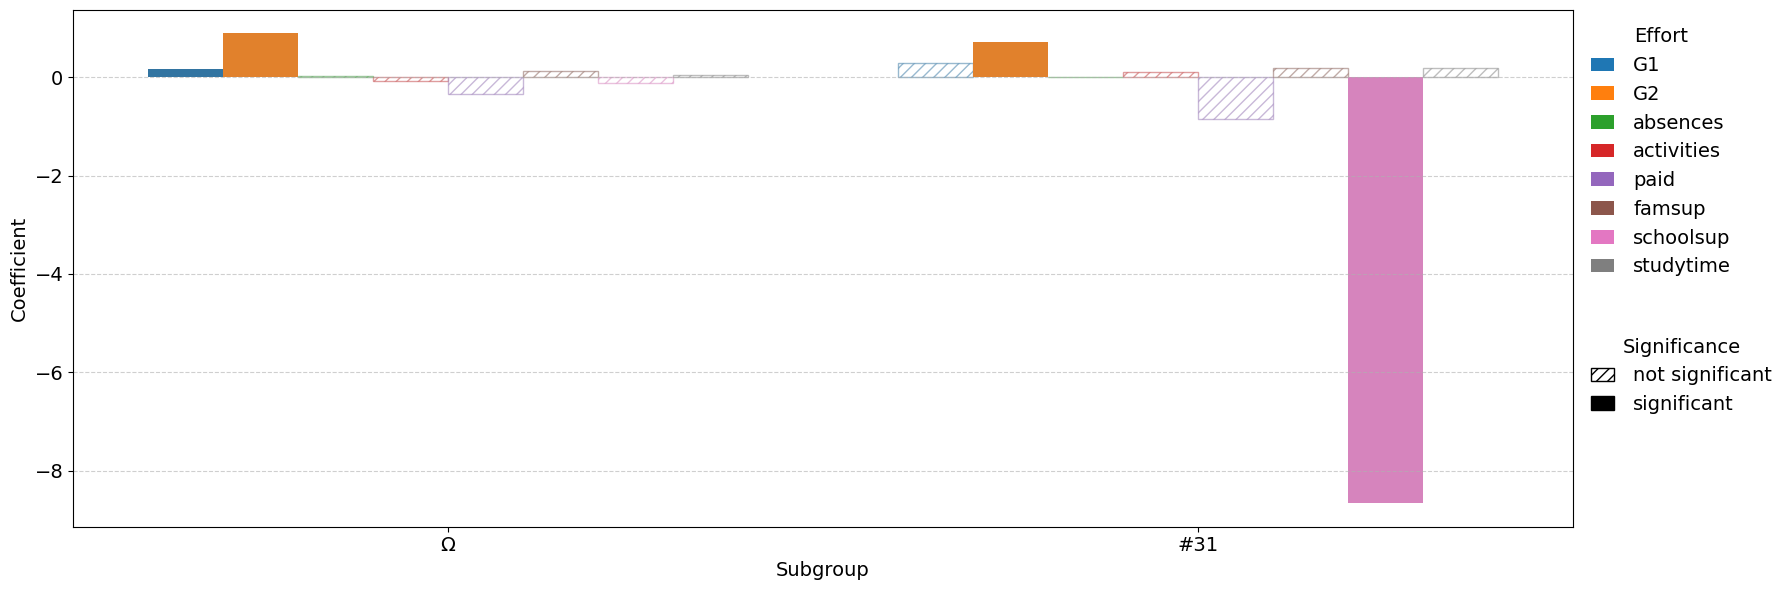

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from matplotlib.patches import Patch


#####
# To DO: Change bar fill depending on significant, yes or no 
#####

palette = sns.color_palette("tab10", 16)
#palette = random.shuffle(palette)
plt.figure(figsize=(18, 6))

df = df_lins#[ df_all['term'] != 'Intercept']

ax = sns.barplot(
    data=df,
    x="subgroup",
    y="coef",
    hue="term",
    dodge=True,
    palette=palette
)
patches_sorted = sorted(ax.patches[:-8], key=lambda p: p.get_x())
print(len(df_lins['significant']), len(ax.patches))
for patch, sig in zip(patches_sorted, df_lins['significant']):
    if sig == 'no':
        patch.set_hatch("///")      # striped fill
        patch.set_edgecolor(patch.get_facecolor())  # keep original color for stripes
        patch.set_facecolor("white")  # base color for hatch
        patch.set_alpha(0.5)
#     # sig == 1 → leave as solid color

ax.set_xlabel("Subgroup", fontsize=14)
ax.set_ylabel("Coefficient", fontsize=14)

# Grid (clean style)how 
ax.yaxis.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.grid(False)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.set_tick_params(labelsize = 14)

# # Legend outside
# # Smaller legend outside the plot
ax.legend(

    title="Effort",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=14,          # legend text size
    title_fontsize=14,    # legend title size
    frameon=False,       # cleaner look
    handlelength=1.2,
    handletextpad=0.5
)
# Custom legend
# Color legend for terms
terms = df_lins["term"].unique()
palette = sns.color_palette("tab10", len(terms))
color_handles = [Patch(facecolor=palette[i], label=term) for i, term in enumerate(terms)]

# # # Hatch legend for significance
sig_handles = [
    Patch(facecolor="white", edgecolor="black", hatch="///", label="not significant"),
    Patch(facecolor="black", edgecolor="black", label="significant")
]

# Combine legends 
first_legend = ax.legend(handles=color_handles, title="Effort", bbox_to_anchor=(1.0, 1), loc="upper left", fontsize=14, title_fontsize=14,    frameon=False,       # cleaner look
    handlelength=1.2,
    handletextpad=1) 
ax.add_artist(first_legend) 
ax.legend(handles=sig_handles, title="Significance", bbox_to_anchor=(1.0, 0.4), loc="upper left", fontsize=14, title_fontsize=14,    frameon=False,       # cleaner look
    handlelength=1.2,
    handletextpad=1)

plt.tight_layout()
plt.show()